# Analítica computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes

## Pandas para limpieza de datos

In [220]:
import numpy as np
import pandas as pd

In [221]:
df = pd.read_csv("incident_event_log.csv")

In [222]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


### Datos faltantes

In [223]:
df.isna()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
141710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


No hay nan, pero hay bastantes datos con "?"

In [224]:
(df == "?").sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [225]:
df.replace("?", np.nan, inplace=True)

df.shape


(141712, 36)

Se reemplazan lo "?" con NaN para mayor facilidad

In [226]:
((df.isna()).sum()/df.shape[0]*100).sort_values(ascending=False)

caused_by                  99.983770
vendor                     99.827820
cmdb_ci                    99.685983
rfc                        99.300694
problem_id                 98.380518
sys_created_by             37.453427
sys_created_at             37.453427
u_symptom                  23.261262
assigned_to                19.402732
assignment_group           10.029496
opened_by                   3.411849
resolved_at                 2.216467
closed_code                 0.503839
resolved_by                 0.159478
subcategory                 0.078328
category                    0.055041
location                    0.053630
caller_id                   0.020464
incident_state              0.000000
number                      0.000000
reassignment_count          0.000000
active                      0.000000
contact_type                0.000000
sys_updated_by              0.000000
made_sla                    0.000000
sys_mod_count               0.000000
reopen_count                0.000000
o

Las columnas "vaused_by, vendor, cmdb_ci, rfc, problem_id" son con mayor datos de datos raros

In [227]:
df.drop_duplicates().shape

(141712, 36)

No hay duplicados :(

In [228]:
print(list(df.columns))
print(len(df.columns))

['number', 'incident_state', 'active', 'reassignment_count', 'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at']
36


In [229]:
#Se filtran los datos
columnas_a_eliminar = ['caused_by', 'vendor', 'cmdb_ci','rfc', 'problem_id', 'sys_created_by','sys_created_at','u_symptom']  # Escribe aquí tus nombres de columnas
df = df.drop(columns=columnas_a_eliminar)
df.shape

(141712, 28)

Al eliminar todas las columnas con un NaN, se queda con un dataframe de 18 columnas que no generan problema

In [230]:
((df.isna()).sum()/df.shape[0]*100).sort_values(ascending=False)

assigned_to                19.402732
assignment_group           10.029496
opened_by                   3.411849
resolved_at                 2.216467
closed_code                 0.503839
resolved_by                 0.159478
subcategory                 0.078328
category                    0.055041
location                    0.053630
caller_id                   0.020464
number                      0.000000
incident_state              0.000000
sys_updated_at              0.000000
sys_updated_by              0.000000
opened_at                   0.000000
made_sla                    0.000000
reopen_count                0.000000
sys_mod_count               0.000000
active                      0.000000
reassignment_count          0.000000
priority                    0.000000
urgency                     0.000000
impact                      0.000000
contact_type                0.000000
notify                      0.000000
u_priority_confirmation     0.000000
knowledge                   0.000000
c

hay 18 columnas sin datos raros, y se queda con 28 columnas en total

Con respecto a la preguntas del negocio, se buscan valores únicos de las columnas relevantes. Las preguntas son:

    ¿Se está cumpliendo con el SLA establecido para la resolución de incidentes? (Desempeño)

    ¿Cómo varía el tiempo de resolución según la categoría del servicio afectado? (Priorización)

    ¿Qué relación tiene el numero de reasignaciones de un caso con respecto a la prioridad?

In [231]:
(df['made_sla'] == True).sum()/df.count().iloc[0] * 100


np.float64(93.49737495766061)

Se tiene un nivel de servicio del 93% vamos bien.

In [232]:
df['sys_updated_by'] = df['sys_updated_by'].str.extract(r'(\d+)')
df['sys_updated_by']



0          21
1         642
2         804
3         908
4         746
         ... 
141707     27
141708    908
141709     60
141710     27
141711     27
Name: sys_updated_by, Length: 141712, dtype: object

Se genera una columna con los numeros de quien actualizó la información.

In [233]:
df["category"].value_counts()



category
Category 26    18453
Category 42    15977
Category 53    15968
Category 46    13324
Category 23     7779
Category 9      7365
Category 32     7273
Category 37     6584
Category 57     6532
Category 20     5506
Category 61     5168
Category 24     4561
Category 34     3946
Category 40     3760
Category 45     3619
Category 51     2390
Category 28     2256
Category 35     2037
Category 44     1798
Category 19     1592
Category 13      994
Category 43      858
Category 55      801
Category 17      512
Category 22      420
Category 56      322
Category 38      290
Category 8       264
Category 7       207
Category 33      160
Category 54      139
Category 50       93
Category 31       92
Category 63       78
Category 2        77
Category 21       69
Category 47       50
Category 59       42
Category 41       36
Category 29       32
Category 5        31
Category 25       30
Category 62       25
Category 10       24
Category 4        22
Category 52       16
Category 30       15
Cate

In [234]:
df['reassignment_count'].describe()

count    141712.000000
mean          1.104197
std           1.734673
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          27.000000
Name: reassignment_count, dtype: float64

In [235]:
df['reassignment_count'].kurtosis()

np.float64(16.523539150876942)

In [236]:
df.loc[df['active'] == False, 'reassignment_count'].describe()

count    24986.000000
mean         0.941767
std          1.573930
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         27.000000
Name: reassignment_count, dtype: float64

Se filtra para contar tan solo las filas de los datos despues de haber cerrado el caso, sea tanto una solucion como no

Analisis pregunta 1

¿Se está cumpliendo con el SLA establecido para la resolución de incidentes? (Desempeño)



In [237]:
(df['made_sla'] == True).sum()/df.count().iloc[0] * 100

np.float64(93.49737495766061)

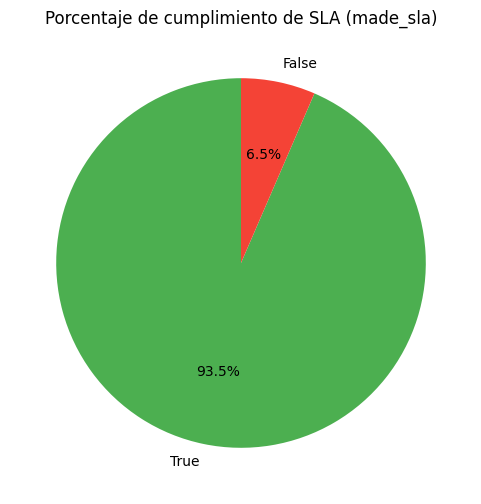

In [238]:
import matplotlib.pyplot as plt

# Cuenta valores True y False
valores = df['made_sla'].value_counts()
labels = ['True', 'False']

plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Porcentaje de cumplimiento de SLA (made_sla)')
plt.show()

In [239]:
df2= df[df['active'] == False]

(df2['made_sla'] == True).sum()/df2.count().iloc[0] * 100

np.float64(63.35948130953334)

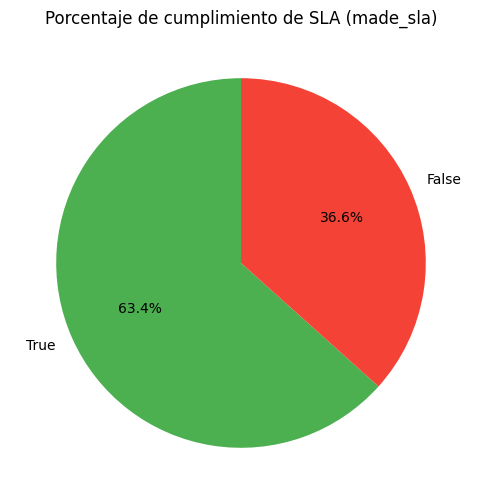

In [240]:
valores = df2['made_sla'].value_counts()
labels = ['True', 'False']

plt.figure(figsize=(6,6))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Porcentaje de cumplimiento de SLA (made_sla)')
plt.show()

Al cerrar la Orden, el nivel de servicio disminue al 64%

In [241]:
# Agrupa por made_sla y cuenta incident_state

conteo = df2.groupby(['contact_type', 'made_sla']).size().unstack(fill_value=0)

# Calcula el porcentaje de nivel de servicio (True) por tipo de contacto
nivel_servicio = conteo[True] / conteo.sum(axis=1) * 100

# Agrega la fila 'nivel_servicio' al DataFrame conteo
conteo.loc[:, 'nivel_servicio'] = nivel_servicio

print(conteo)

made_sla        False   True  nivel_servicio
contact_type                                
Direct opening      0      4      100.000000
Email              39     20       33.898305
IVR                 0      9      100.000000
Phone            9046  15708       63.456411
Self service       70     90       56.250000


El nivel de servicio que menor satisfacción genera es Email

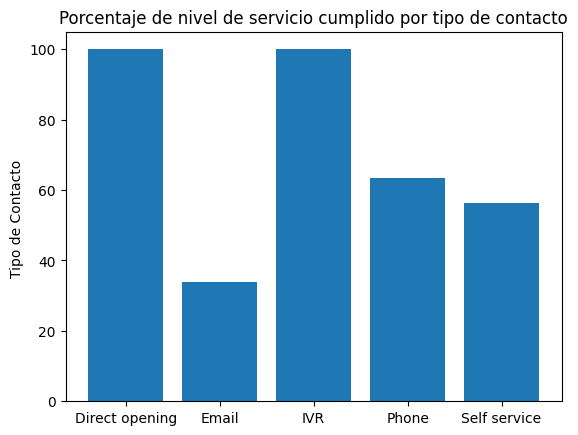

contact_type
Direct opening    100.000000
Email              33.898305
IVR               100.000000
Phone              63.456411
Self service       56.250000
Name: nivel_servicio, dtype: float64


In [242]:
fig, ax = plt.subplots()

contacto = conteo.index

porcentaje_true = conteo['nivel_servicio']

ax.bar(contacto, porcentaje_true)

ax.set_ylabel('Tipo de Contacto ')
ax.set_title('Porcentaje de nivel de servicio cumplido por tipo de contacto')

plt.show()

print(porcentaje_true)

De los casos cerrados, El Direct Openin y IVR son las que generan mayor nivel de servicio.

In [243]:
conteo2 = df2.groupby(['urgency', 'made_sla']).size().unstack(fill_value=0)

# Calcula el porcentaje de nivel de servicio (True) por tipo de contacto
nivel_servicio = conteo2[True] / conteo2.sum(axis=1) * 100

# Agrega la fila 'nivel_servicio' al DataFrame conteo
conteo2.loc[:, 'nivel_servicio'] = nivel_servicio

print(conteo2)

made_sla    False   True  nivel_servicio
urgency                                 
1 - High      521     11        2.067669
2 - Medium   8522  15232       64.123937
3 - Low       112    588       84.000000


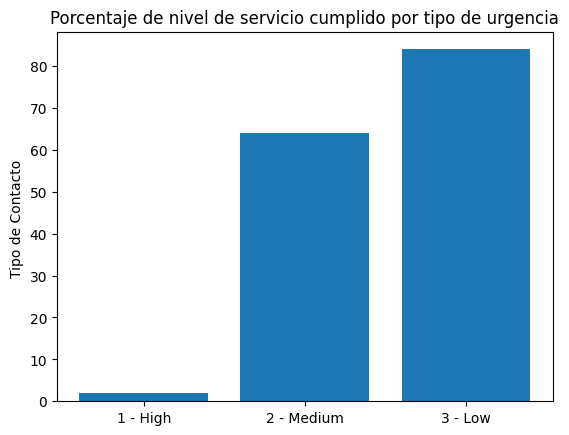

urgency
1 - High       2.067669
2 - Medium    64.123937
3 - Low       84.000000
Name: nivel_servicio, dtype: float64


In [244]:
fig, ax = plt.subplots()

contacto = conteo2.index

porcentaje_true = conteo2['nivel_servicio']

ax.bar(contacto, porcentaje_true)

ax.set_ylabel('Tipo de Contacto ')
ax.set_title('Porcentaje de nivel de servicio cumplido por tipo de urgencia')

plt.show()

print(porcentaje_true)

La urgencia funciona Empeora el nivel de servicio

pregunta 2:
¿Cómo varía el tiempo de resolución según la categoría del servicio afectado? (Priorización)

In [245]:
df2 = df.loc[df['active'] == False].copy()
df2['resolution_time'] = (pd.to_datetime(df2['resolved_at']) - pd.to_datetime(df2['opened_at'])).dt.total_seconds() / 3600

df2 = df2.dropna(subset=['resolution_time'])

df2['resolution_time'].isna().sum() 

C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_15776\220138697.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['resolution_time'] = (pd.to_datetime(df2['resolved_at']) - pd.to_datetime(df2['opened_at'])).dt.total_seconds() / 3600
C:\Users\WINDOWS 11\AppData\Local\Temp\ipykernel_15776\220138697.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['resolution_time'] = (pd.to_datetime(df2['resolved_at']) - pd.to_datetime(df2['opened_at'])).dt.total_seconds() / 3600


np.int64(0)

Se eliminan los datos que son tipo NaN y se calcula el tiempo de resolución de los datos

In [246]:
df2['resolution_time'].describe()

count    23428.000000
mean       178.827766
std        533.787070
min          0.000000
25%          0.416667
50%         22.250000
75%        149.075000
max       8070.166667
Name: resolution_time, dtype: float64

In [247]:
df2['resolution_time'].kurtosis()

np.float64(60.02907098001509)

<Axes: xlabel='resolution_time', ylabel='Count'>

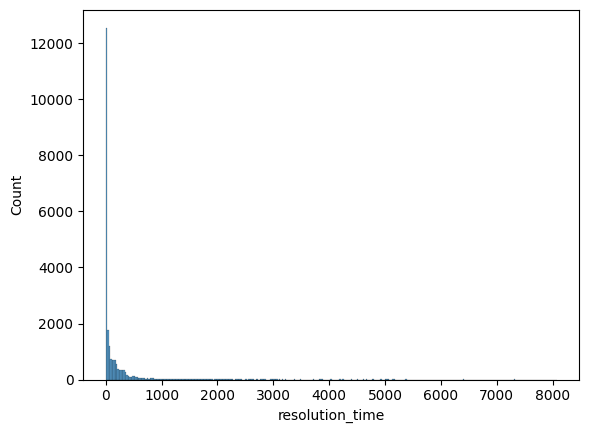

In [248]:
import seaborn as sns

sns.histplot(data=df2, x="resolution_time")

In [249]:
top = df2['resolution_time'].nlargest(20)
print(top)

7816      8070.166667
5627      8020.266667
32861     7803.683333
8033      7316.450000
8491      7313.933333
8522      7313.866667
83450     7220.583333
1019      7122.283333
912       7056.416667
18210     6729.000000
26241     6557.966667
862       6473.850000
4676      6410.550000
44543     6409.233333
20669     6405.866667
107377    6401.633333
8507      6336.850000
42800     6312.683333
132365    6293.783333
126442    6263.300000
Name: resolution_time, dtype: float64


<Axes: xlabel='resolution_time', ylabel='Count'>

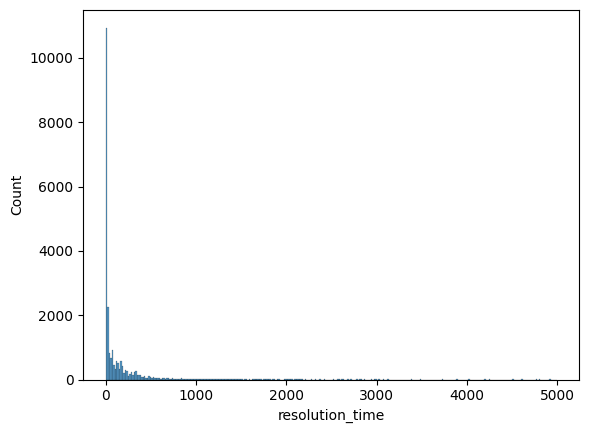

In [253]:
# Filtra el DataFrame para dejar solo los datos con resolution_time menor a 7000
df2_filtrado = df2[df2['resolution_time'] < 5000]

sns.histplot(data=df2_filtrado, x="resolution_time")

Se asemeja a una distribución exponencial con multiples datos atípicos.

In [258]:
promedio_por_categoria = df2.groupby('category')['resolution_time'].mean()
print(promedio_por_categoria)


category
Category 10      93.433333
Category 12      53.433333
Category 13      91.064071
Category 14      87.766667
Category 16       2.966667
Category 17     183.470886
Category 19     276.525646
Category 2      246.755556
Category 20      58.579278
Category 21      62.079167
Category 22     502.823000
Category 23     152.075417
Category 24     279.283832
Category 25     118.429167
Category 26      83.492180
Category 28     115.230481
Category 29      60.927778
Category 30     174.616667
Category 31      90.633333
Category 32      65.875570
Category 33    1107.444792
Category 34    1332.878033
Category 35      23.543654
Category 37     131.913952
Category 38     148.173750
Category 4      148.466667
Category 40     153.140964
Category 42      98.635521
Category 43     116.275926
Category 44     155.409259
Category 45     488.330884
Category 46     315.702845
Category 47     296.005556
Category 48     257.783333
Category 5        0.171667
Category 50     102.996875
Category 51      40